In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pandas import DataFrame
%matplotlib inline 
# read in the MOOC data

path = '/users/teddyandalex/documents/data_science/'
mooc_cols = ['course_id', 'userid_di', 'registered', 'viewed', 'explored', 'certified', 'final_cc_cname_di', 'loe_di', 'yob', 'gender', 'grade', 'start_time_di', 
'last_event_di', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'incomplete_flag']
mooc = path + 'HMXPC13_DI_v2_5-14-14.csv'
mooc_data = pd.read_csv(mooc, header=0, names=mooc_cols, na_values='NAN')
mooc_data.head()

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,course_id,userid_di,registered,viewed,explored,certified,final_cc_cname_di,loe_di,yob,gender,grade,start_time_di,last_event_di,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,2013-11-17,NaN,9,NaN,NaN,0,NaN,1
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,2012-10-15,NaN,NaN,9,NaN,1,0,NaN,1
2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2013-02-08,2013-11-17,NaN,16,NaN,NaN,0,NaN,1
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-09-17,NaN,NaN,16,NaN,NaN,0,NaN,1
4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,2012-12-19,NaN,NaN,16,NaN,NaN,0,NaN,1


In [2]:
# create age variable

mooc_data['yob'].dtype
mooc_data['new_yob']=mooc_data.yob.convert_objects(convert_numeric=True)
mooc_data['age'] = 2013 - mooc_data['new_yob']

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [3]:
# create outcome variable (out of three outcome dummies)
mooc_data['outcome']=''

mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=1
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 0),'outcome']=2
mooc_data.loc[(mooc_data['viewed'] == 0) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 0),'outcome']=2
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 1) & (mooc_data['certified'] == 1),'outcome']=3
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 1),'outcome']=3
mooc_data.loc[(mooc_data['viewed'] == 0) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=0

counts = mooc_data['outcome'].value_counts(sort = False)  
print counts

0    240868
1    359894
2     22689
3     17687
Name: outcome, dtype: int64


In [4]:
# look at courses
mooc_data.course_id.value_counts()   
cs50 = mooc_data.loc[mooc_data.course_id == "HarvardX/CS50x/2012"]
# Look at class interaction variables
 #'start_time_di', 'last_event_di', 'nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts', 'roles', 'time_elapse',  

cs50.describe()


,registered,viewed,explored,certified,yob,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag,new_yob,age
count,169621,169621.000000,169621.000000,169621.000000,149828.000000,49680.000000,58306.00000,0,106489.000000,169621,0,68862,149828.000000,149828.000000
mean,1,0.625430,0.064986,0.007588,1984.892604,39.547806,4.31784,NaN,2.565598,0,NaN,1,1984.892604,28.107396
std,0,0.484013,0.246502,0.086775,9.081319,89.655333,8.26345,NaN,2.768481,0,NaN,0,9.081319,9.081319
min,1,0.000000,0.000000,0.000000,1935.000000,1.000000,1.00000,NaN,1.000000,0,NaN,1,1935.000000,0.000000
25%,1,0.000000,0.000000,0.000000,1981.000000,3.000000,1.00000,NaN,1.000000,0,NaN,1,1981.000000,22.000000
50%,1,1.000000,0.000000,0.000000,1987.000000,10.000000,2.00000,NaN,1.000000,0,NaN,1,1987.000000,26.000000
75%,1,1.000000,0.000000,0.000000,1991.000000,31.000000,3.00000,NaN,3.000000,0,NaN,1,1991.000000,32.000000
max,1,1.000000,1.000000,1.000000,2013.000000,3491.000000,176.00000,NaN,12.000000,0,NaN,1,2013.000000,78.000000


In [5]:
#run model on CS50 course dataset
from pandas import DataFrame

from sklearn.cluster import KMeans
#preprocessing
#replace NaNs to 0s

list = ['nevents', 'ndays_act', 'nplay_video', 'nchapters', 'nforum_posts']
#for what in range(0,5):
    #print list[what]
    #print cs50[list[what]].value_counts()


In [6]:
list2 = ['nevents', 'ndays_act', 'nchapters']
mooc_data.loc[(mooc_data['viewed'] == 1) & (mooc_data['explored'] == 0) & (mooc_data['certified'] == 0),'outcome']=1
for what in range(0,len(list2)):
    cs50[list2[what]].fillna(0, inplace = True)
      
for what in range(0,len(list2)):
    print pd.isnull(cs50[list2[what]]).value_counts()

#converting variables into z-scores
from sklearn import preprocessing
listz = ['znevents', 'zndays_act', 'znchapters']
for what in range(0,len(listz)):
    cs50[listz[what]] = preprocessing.scale(cs50[list2[what]])

for X in range(0, len(listz)):
    print cs50[listz[X]].describe()

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False    169621
Name: nevents, dtype: int64
False    169621
Name: ndays_act, dtype: int64
False    169621
Name: nchapters, dtype: int64
count    1.696210e+05
mean     5.007667e-14
std      1.000003e+00
min     -2.238250e-01
25%     -2.238250e-01
50%     -2.238250e-01
75%     -1.851781e-01
max      6.723427e+01
Name: znevents, dtype: float64
count    1.696210e+05
mean     2.631122e-14
std      1.000003e+00
min     -2.821211e-01
25%     -2.821211e-01
50%     -2.821211e-01
75%     -9.204155e-02
max      3.317187e+01
Name: zndays_act, dtype: float64
count    1.696210e+05
mean    -3.472878e-14
std      1.000003e+00
min     -6.391946e-01
25%     -6.391946e-01
50%     -2.423511e-01
75%      1.544925e-01
max      4.122928e+00
Name: znchapters, dtype: float64


In [7]:
cs50.head()

,course_id,userid_di,registered,viewed,explored,certified,final_cc_cname_di,loe_di,yob,gender,...,nchapters,nforum_posts,roles,incomplete_flag,new_yob,age,outcome,znevents,zndays_act,znchapters
1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,1,0,NaN,1,NaN,NaN,1,-0.223825,1.428594,-0.242351
3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,0,0,NaN,1,NaN,NaN,0,-0.223825,2.759151,-0.639195
9,HarvardX/CS50x/2012,MHxPC130088379,1,1,0,0,United States,NaN,NaN,NaN,...,3,0,NaN,1,NaN,NaN,1,-0.223825,1.998833,0.551336
13,HarvardX/CS50x/2012,MHxPC130024894,1,1,0,0,United States,NaN,NaN,NaN,...,2,0,NaN,1,NaN,NaN,1,-0.223825,0.098038,0.154492
17,HarvardX/CS50x/2012,MHxPC130080986,1,1,0,0,United States,NaN,NaN,NaN,...,1,0,NaN,1,NaN,NaN,1,-0.223825,1.808753,-0.242351


In [8]:
#drop outliers
print cs50.shape
cs50['nevents'].describe()
cs50 = cs50[cs50['nevents'] < 1500]
print cs50.shape

(169621, 26)
(169616, 26)


In [9]:
#Run kmeans model
from sklearn.cluster import KMeans
feature_cols = ['znevents', 'zndays_act', 'znchapters']
X = cs50[feature_cols]
k_means = KMeans(n_clusters=2)
k_means.fit(X)
labels = k_means.labels_
iner = k_means.inertia_
centroids = k_means.cluster_centers_
pd.value_counts(labels)
cs50['Cluster_labels'] = pd.Series(labels, index=cs50.index)



In [10]:
cs50.describe()
print centroids

[[-0.13499196 -0.13724862 -0.10809468]
 [ 4.01354793  4.10204127  3.23936882]]


In [11]:
# determining optimal number of clusters
from sklearn.cluster import KMeans
k_range = range(1,11)

def k_var(xv,kran):
    kiner_tuple = []
    kiner_perc = []
    for kr in kran:
        k_means = KMeans(n_clusters = kr)
        k_means.fit(xv)
        iner = k_means.inertia_
        #perc = iner/tss
        kiner_tuple.append((kr,iner))
        #kiner_perc.append(perc)
        print kr
        #print perc
    return kiner_tuple
    
k_tup = k_var(X,k_range)


1
2
3
4
5
6
7
8
9
10


In [12]:
print k_tup

[(1, 498266.91485142149), (2, 252667.4864048459), (3, 160623.36706727688), (4, 129789.0300113509), (5, 105963.69294719222), (6, 89763.284775944616), (7, 76502.470776827089), (8, 67296.163914579491), (9, 60066.963292778142), (10, 55396.158245799394)]


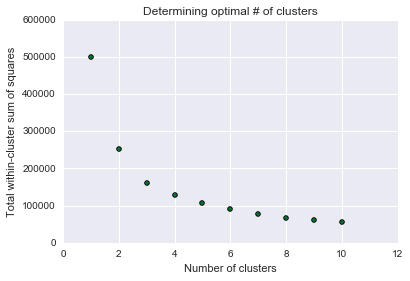

In [13]:
#graph total within cluster variance by # of clusters
#Plot this to find point where marginal gain in variance explains drops (elbow)
import matplotlib.pyplot as plt

r = []
s = []
for km, ss in k_tup:
    r.append(km)
    s.append(ss)

plt.title('Determining optimal # of clusters')
plt.ylabel('Total within-cluster sum of squares')
plt.xlabel('Number of clusters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.g')



In [14]:
# # determining optimal number of clusters
# by calculating silhouette score for sample (can't do for full sample bc it's too big)
import random
from sklearn import metrics
cols = ['znevents', 'zndays_act', 'znchapters', 'Cluster_labels']
X = cs50[cols]
X_samp = X.sample(n=10000, replace=False, random_state=1, axis=0)
X_samp.shape
ran = range(0,10000)
key = [ran]
X_samp.set_index(key, drop=True, inplace = True)
print X_samp        
vrs = ['znevents', 'zndays_act', 'znchapters']
labs = X_samp['Cluster_labels']
labels = labs.as_matrix()
metrics.silhouette_score(X_samp[vrs], labels)

       znevents  zndays_act  znchapters  Cluster_labels
0     -0.069238   -0.092042   -0.242351               0
1     -0.223825   -0.282121    0.551336               0
2     -0.223825   -0.282121   -0.639195               0
3     -0.223825   -0.282121   -0.242351               0
4     -0.223825   -0.282121   -0.242351               0
5     -0.223825   -0.282121   -0.639195               0
6     -0.223825   -0.282121   -0.639195               0
7     -0.223825   -0.282121    0.154492               0
8     -0.223825   -0.282121   -0.639195               0
9     -0.165855    0.098038   -0.639195               0
10    -0.223825   -0.282121   -0.242351               0
11    -0.223825    3.899628   -0.242351               0
12     0.220614    0.288117   -0.242351               0
13    -0.223825   -0.282121   -0.242351               0
14    -0.223825   -0.282121    0.154492               0
15    -0.223825   -0.282121   -0.639195               0
16    -0.223825   -0.282121   -0.639195         

0.85774304798977408

In [15]:
# set up function to plot silhouette score against number of clusters
from sklearn.cluster import KMeans
feature_cols = ['znevents', 'zndays_act', 'znchapters']
X = cs50[feature_cols]
X_samp = X.sample(n=20000, replace=False, random_state=27, axis=0)
ran = range(0,20000)
key = [ran]
X_samp.set_index(key, drop=True, inplace = True)

def k_sil(xv,kran):
    ksil_tuple = []
    for kr in kran:
        k_means = KMeans(n_clusters = kr)
        k_means.fit(xv)
        labels = k_means.labels_
        sil = metrics.silhouette_score(xv, labels)
        ksil_tuple.append((kr,sil))
        print kr
    return ksil_tuple


In [16]:
k_range = range(2,11)
k_sil2 = k_sil(X_samp,k_range)
print k_sil2

2
3
4
5
6
7
8
9
10
[(2, 0.86040708062008942), (3, 0.78783199948873661), (4, 0.75858382291971105), (5, 0.56170147268105031), (6, 0.57300589828812487), (7, 0.57668871737909999), (8, 0.57775781502262824), (9, 0.56969409829879769), (10, 0.57601540647041094)]


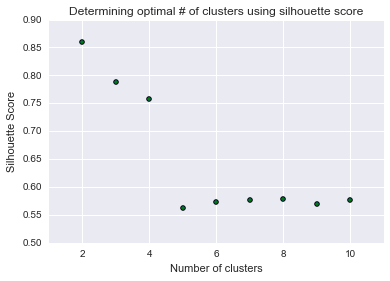

In [17]:
#graph silhouette score against # of clusters
import matplotlib.pyplot as plt
%matplotlib inline 
r = []
s = []
for km, ss in k_sil2:
    r.append(km)
    s.append(ss)

plt.title('Determining optimal # of clusters using silhouette score')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of clusters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.g')

In [18]:
#Set variables for plot

rkm = cs50['Cluster_labels']
x=cs50['znevents']
y=cs50['zndays_act']
z=cs50['znchapters']
list = [x,y,z]

print cs50['Cluster_labels'].value_counts()
cs50['outcome'].value_counts(sort = False)

0    164145
1      5471
Name: Cluster_labels, dtype: int64


0    63535
1    95058
2     9738
3     1285
Name: outcome, dtype: int64

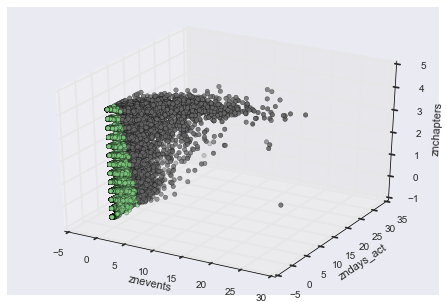

In [19]:
#plot CS50 Kmeans results - 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
print ax.scatter(x,y,z, c=rkm, cmap=plt.cm.Accent)


(164145,)
(5471,)


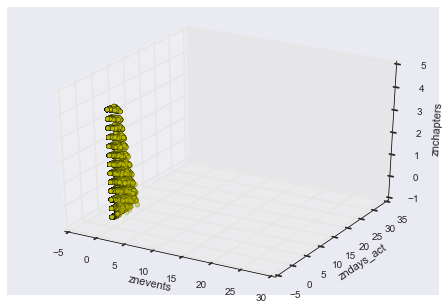

In [20]:
#show clusters separately: cluster 1

r0 = cs50[cs50['Cluster_labels']==0]
r1 = cs50[cs50['Cluster_labels']==1]
x0 = r0['znevents']
x1 = r1['znevents']
y0 = r0['zndays_act']
y1 = r1['zndays_act']
z0 = r0['znchapters']
z1 = r1['znchapters']
rout0 = r0['outcome']
rout1 = r1['outcome']
print y0.shape
print y1.shape
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim([-5,30])
ax.set_ylim([-5, 35])
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
first =  ax.scatter(x0,y0,z0, c='y')
plt.show()


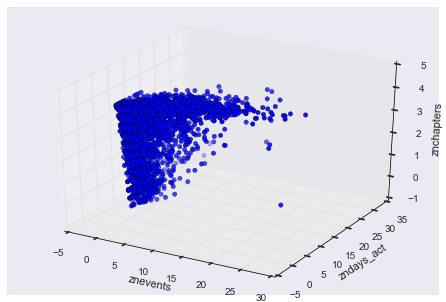

In [21]:
# Show second cluster separately
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim([-5,30])
ax.set_ylim([-5, 35])
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
second =  ax.scatter(x1,y1,z1, c='b')
#plt.legend((first, second),('first cluster','second cluster'))
plt.show()

In [22]:
# Compare clusters with course outcomes
#Set variables for plot

rkm = cs50['outcome']
x=cs50['znevents']
y=cs50['zndays_act']
z=cs50['znchapters']
list = [x,y,z]

cs50['Cluster_labels'].value_counts()
cs50['outcome'].value_counts(sort = False)


0    63535
1    95058
2     9738
3     1285
Name: outcome, dtype: int64

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


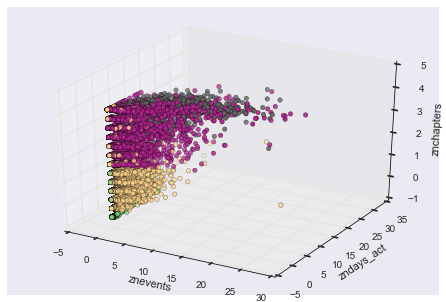

In [23]:
#plot CS50 outcomes against course interaction vars - 
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
plt.title('CS50 Course Outcomes against Course Interaction Vars')
ax = Axes3D(fig)
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
print ax.scatter(x,y,z, c=rkm, cmap=plt.cm.Accent)
plt.grid(True)
plt.legend()
plt.show()



(63535,)
(1285,)


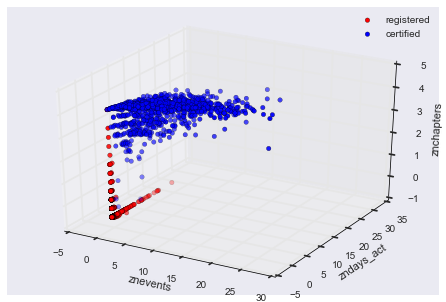

In [24]:
r0 = cs50[cs50['outcome']==0]
r1 = cs50[cs50['outcome']==1]
r2 = cs50[cs50['outcome']==2]
r3 = cs50[cs50['outcome']==3]
x0 = r0['znevents']
x1 = r1['znevents']
x2 = r2['znevents']
x3 = r3['znevents']
y0 = r0['zndays_act']
y1 = r1['zndays_act']
y2 = r2['zndays_act']
y3 = r3['zndays_act']
z0 = r0['znchapters']
z1 = r1['znchapters']
z2 = r2['znchapters']
z3 = r3['znchapters']
print y0.shape
print y3.shape
colors = ['blue', 'green', 'magenta', 'cyan']
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim([-5,30])
ax.set_ylim([-5, 35])
ax.set_xlabel('znevents')
ax.set_ylabel('zndays_act')
ax.set_zlabel('znchapters')
first =  ax.scatter(x0,y0,z0, c = 'r')
#second = ax.scatter(x1,y1,z1,  c = 'y')
#third = ax.scatter(x2,y2,z2, c = 'g')
fourth = ax.scatter(x3,y3,z3, c = 'b')
plt.legend((first, fourth),('registered','certified'))
plt.show()
#'b', 'c', 'y', 'm', 'r'

In [25]:
#characterize kmeans and outcome groups

#cs50.nevents.groupby('Cluster_labels').mean()
list = ['nevents', 'ndays_act', 'nchapters']
for X in range(0,len(list)):
    print list[X]
    print cs50[list[X]].groupby(cs50['Cluster_labels']).mean()
    print cs50[list[X]].groupby(cs50['Cluster_labels']).min()
    print cs50[list[X]].groupby(cs50['Cluster_labels']).max()

print cs50['outcome'].groupby(cs50['Cluster_labels']).value_counts()   

list = ['nevents', 'ndays_act', 'nchapters']
for X in range(0,len(list)):
    print list[X]
    print cs50[list[X]].groupby(cs50['outcome']).mean()
    print cs50[list[X]].groupby(cs50['outcome']).min()
    print cs50[list[X]].groupby(cs50['outcome']).max()    
    
    

nevents
Cluster_labels
0      4.597167
1    219.286785
Name: nevents, dtype: float64
Cluster_labels
0    0
1    0
Name: nevents, dtype: float64
Cluster_labels
0     236
1    1380
Name: nevents, dtype: float64
ndays_act
Cluster_labels
0     0.762168
1    23.064888
Name: ndays_act, dtype: float64
Cluster_labels
0    0
1    1
Name: ndays_act, dtype: float64
Cluster_labels
0     32
1    176
Name: ndays_act, dtype: float64
nchapters
Cluster_labels
0    1.338311
1    9.773533
Name: nchapters, dtype: float64
Cluster_labels
0    0
1    0
Name: nchapters, dtype: float64
Cluster_labels
0    12
1    12
Name: nchapters, dtype: float64
Cluster_labels   
0               1    94264
                0    63510
                2     6320
                3       51
1               2     3418
                3     1234
                1      794
                0       25
dtype: int64
nevents
outcome
0      0.259573
1      7.366818
2     89.932840
3    281.546304
Name: nevents, dtype: float64
outcome
0   

In [26]:
#create survival function
%matplotlib inline 
chapters = cs50['nchapters']
table1 = pd.Series.value_counts(chapters, sort = False)
print table1
sum1 = pd.Series.sum(table1)
zero = 0
sum = sum1
table2 = []
for k in range(0,12):
    index_tot = (table1.ix[k:13].sum())
    per_drop = table1.ix[k]/(index_tot*1.0)
    table2.append((k,per_drop))
print table2

0     63132
1     54112
2     25093
3      8198
4      4945
5      2888
6      1536
7      1290
8       925
9       954
10     1008
11      696
12     4839
Name: nchapters, dtype: int64
[(0, 0.37220545231581925), (1, 0.50817024153863488), (2, 0.47913006950278775), (3, 0.3005242127643975), (4, 0.2591583250353755), (5, 0.20430107526881722), (6, 0.13655761024182078), (7, 0.13282537067545305), (8, 0.10983139396817858), (9, 0.12725090036014405), (10, 0.15405777166437415), (11, 0.12574525745257453)]


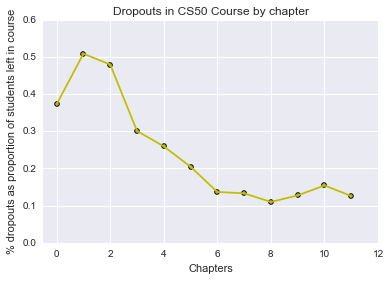

In [27]:
#plot survival function
r = []
s = []
for i,va in table2:
    r.append(i)
    s.append(va)
plt.minorticks_on()
plt.title('Dropouts in CS50 Course by chapter')
plt.ylabel('% dropouts as proportion of students left in course')
plt.xlim(xmax=12)
plt.xlim(xmin=-.5)
plt.xlabel('Chapters')
plt.scatter(r, s, linewidths = 1)
plt.plot(r,s,'.y',linestyle='solid')

0     63132
1     54112
2     25093
3      8198
4      4945
12     4839
5      2888
6      1536
7      1290
10     1008
9       954
8       925
11      696
Name: nchapters, dtype: int64


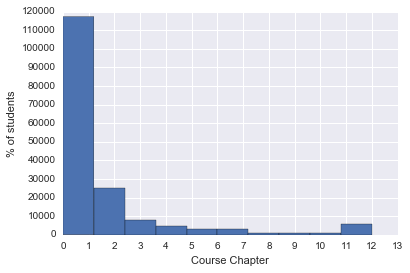

In [28]:
#plot dropout rates by chapter
chapters.plot(kind='hist')
plt.locator_params(nbins = 15)
plt.xlim(xmax=13)
plt.xlim(xmin=0)
plt.xlabel('Course Chapter')
plt.ylabel('% of students')
print chapters.value_counts()

In [29]:
#Prediction
#create dummies for country, female, highest degree
attr = ['final_cc_cname_di', 'gender' ,'loe_di']
for X in range(0,2):
    cs50[attr[X]].value_counts()

cs50.final_cc_cname_di.value_counts()
dummies_gender=pd.get_dummies(cs50.gender, prefix = 'gd')
cs50 = pd.concat([cs50, dummies_gender], axis = 1)

dummies_country= pd.get_dummies(cs50.final_cc_cname_di, prefix = 'cty')
cs50 = pd.concat([cs50, dummies_country], axis = 1)

dummies_deg = pd.get_dummies(cs50.loe_di, prefix = 'deg')
cs50 = pd.concat([cs50, dummies_deg], axis = 1)

print cs50.ix[:,20:].head()




    new_yob  age outcome  znevents  zndays_act  znchapters  Cluster_labels  \
1       NaN  NaN       1 -0.223825    1.428594   -0.242351               0   
3       NaN  NaN       0 -0.223825    2.759151   -0.639195               0   
9       NaN  NaN       1 -0.223825    1.998833    0.551336               0   
13      NaN  NaN       1 -0.223825    0.098038    0.154492               0   
17      NaN  NaN       1 -0.223825    1.808753   -0.242351               0   

    gd_f  gd_m  gd_o      ...        cty_Spain  cty_Ukraine  \
1      0     0     0      ...                0            0   
3      0     0     0      ...                0            0   
9      0     0     0      ...                0            0   
13     0     0     0      ...                0            0   
17     0     0     0      ...                0            0   

    cty_United Kingdom  cty_United States  cty_Unknown/Other  deg_Bachelor's  \
1                    0                  1                  0            

In [30]:
#create list for country dummies

country = cs50.final_cc_cname_di.value_counts()
listcty = []
for index, values in pd.Series.iteritems(country):
    cty1 = 'cty_' + str(index)
    listcty.append(cty1)

print listcty

['cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']


In [31]:
#prepare other variables for prediction
list = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", "age"]
for item in range(0,len(listcty)):
    list.append(listcty[item])
import copy
feature_cols = copy.copy(list)
list = []
print len(feature_cols)
print feature_cols
print cs50.outcome.value_counts()


for what in range(0,len(feature_cols)):
    cs50[feature_cols[what]].fillna(0, inplace = True)


41
['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
1    95058
0    63535
2     9738
3     1285
Name: outcome, dtype: int64


In [32]:
cs50.gd_f.describe()
print pd.isnull(cs50['gd_f']).value_counts

<bound method Series.value_counts of 1         False
3         False
9         False
13        False
17        False
19        False
20        False
21        False
22        False
24        False
25        False
26        False
27        False
28        False
30        False
33        False
34        False
35        False
37        False
40        False
45        False
47        False
49        False
50        False
51        False
53        False
54        False
56        False
57        False
59        False
          ...  
338151    False
338152    False
338154    False
338163    False
338165    False
338167    False
338169    False
338171    False
338173    False
338177    False
338184    False
338185    False
338187    False
338188    False
338189    False
338190    False
338191    False
338196    False
338197    False
338199    False
338201    False
338203    False
338211    False
338212    False
338214    False
338217    False
338219    False
338220    False
338221    False
338

In [33]:
#KNN Prediction - trial run
from sklearn.neighbors import KNeighborsClassifier
# make an instance of a KNeighborsClassifier object

X = cs50[feature_cols]
y = cs50['outcome']
knn = KNeighborsClassifier(n_neighbors=45)
type(knn)
knn.fit(X, y)
y_pc = knn.predict(X)
print X.dtypes
print y.dtype
yint=y.astype('int64')


gd_f                                          float64
deg_Doctorate                                 float64
deg_Less than Secondary                       float64
deg_Master's                                  float64
deg_Secondary                                 float64
deg_Bachelor's                                float64
age                                           float64
cty_Unknown/Other                             float64
cty_United States                             float64
cty_India                                     float64
cty_Other Europe                              float64
cty_Other Africa                              float64
cty_United Kingdom                            float64
cty_Canada                                    float64
cty_Brazil                                    float64
cty_Other Middle East/Central Asia            float64
cty_Other South Asia                          float64
cty_Russian Federation                        float64
cty_Pakistan                

In [34]:
print pd.Series(y_pc).value_counts()

1    136174
0     33442
dtype: int64


In [35]:
# Evaluation KNN Predictions Using Train-Test Split
#define function for 1 KNN evaluation using accuracy score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_knn(Xf, yf, rand, nn):
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=43)
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn.fit(X_tr, y_tr)
    y_pc = knn.predict(X_te)
    met = (metrics.accuracy_score(y_te, y_pc))
    return met
eval_knn(X,yint,7, 45)

0.55381567776624852

In [36]:
#Tuning
#define function for multiple KNN evaluations, varying on n_neighbors, this time n_neighbors is an array

def eval_knn_nn(Xf, yf, rand, nnl):
    nmet_tuple = []
    for value in nnl:
        print value
        measure = eval_knn(Xf, yf, rand, value)
        nmet_tuple.append((value, measure))
    return nmet_tuple
    

In [37]:
#nnlist = np.arange(1,101)
#test = eval_knn_nn(X,yint,150,nnlist)
#print test


In [38]:
#plot results
#import matplotlib.pyplot as plt
#n = []
#v = []
#for neigh, val in test:
 #   n.append(neigh)
  #  v.append(val)

#plt.title('Tuning KNN Model')
#plt.ylabel('Accuracy Score')
#plt.xlabel('Number of Neighbors')
#plt.scatter(n, v, linewidths = 1)
#plt.plot(n,v,'.r-')
#plt.show()


In [39]:
print len(feature_cols)
cs50.describe()
#for what in range(0,len(feature_cols)):
    #cs50[fe]
   
print pd.isnull(cs50['age']).value_counts()

    #print pd.isnull(cs50[feature_cols[what]]).value_counts()

41
False    169616
Name: age, dtype: int64


In [40]:
#Logistic  Regression Model
# fit a logistic regression model and store the class predictions
#feature_cols already defined above
from sklearn.linear_model import LogisticRegression
feature_cols1 = ['gd_f', 'deg_Doctorate', #'deg_Less than Secondary'#
                  "deg_Master's", 'deg_Secondary', "deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']

logreg = LogisticRegression()

X = cs50[feature_cols1]
y = cs50['outcome']
logreg.fit(X, y)
cs50['log_pred_class'] = logreg.predict(X)
cs50['log_pred_class'].value_counts()

1    146496
0     23120
Name: log_pred_class, dtype: int64

In [41]:
# Examine Coefficients
print feature_cols
print len(feature_cols)
zip(logreg.coef_)

['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
41


[(array([  1.57572326e-01,   4.09720416e-02,   8.43216712e-02,
          -4.77660080e-02,   1.25911907e-01,   4.88902331e-04,
           6.16450612e-01,  -1.50046070e-01,  -4.16912442e-01,
           1.18853197e-01,  -2.39046362e-01,  -9.78218679e-02,
           6.74728915e-03,   9.19745657e-02,  -6.79043405e-02,
           1.79019802e-01,   3.43493498e-01,   1.55117331e-01,
           2.16115493e-01,  -4.08215794e-01,  -1.53988166e-03,
           1.39306526e-02,   2.15544359e-01,  -3.29585386e-01,
          -2.08296484e-01,  -8.80660935e-02,  -1.31933704e-01,
          -1.83176571e-01,  -2.33104180e-01,  -1.93691295e-01,
          -4.57595106e-01,  -5.25755116e-01,  -9.25221170e-02,
           2.12891153e-01,   1.57183319e-01,   2.18290268e-01,
          -1.69962064e-01,  -3.30481152e-01,  -3.90230474e-01]),),
 (array([ -4.34782125e-02,  -5.06802268e-02,  -4.17070207e-02,
           6.63100897e-02,  -6.94739390e-02,  -5.94442439e-05,
          -4.10923394e-01,  -1.03347309e-01,   2.03

In [42]:
#evaluate model
#cross validation score - doesn't work with multiclass format
#use accuracy score
# Evaluation logistic model Using Train-Test Split and accuracy scores
from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_log(Xf, yf, rand):
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    logreg = LogisticRegression()
    logreg.fit(X_tr, y_tr)
    y_pc = logreg.predict(X_te)
    met = (metrics.accuracy_score(y_te, y_pc))
    print metrics.accuracy_score(y_te, y_pc)
    return met
eval_log(X,yint,7)

0.561833789265


0.5618337892651637

In [43]:
print feature_cols

['gd_f', 'deg_Doctorate', 'deg_Less than Secondary', "deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States', 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece', 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']


In [44]:
#create different versions of feature vectors and test models
feature_cols1 = ['gd_f', 'deg_Doctorate', #'deg_Less than Secondary'#
                  "deg_Master's", 'deg_Secondary', "deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
feature_cols2 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
"deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_Unknown/Other', 'cty_United States']
feature_cols3 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
"deg_Master's", 'deg_Secondary', "deg_Bachelor's", 'age', 'cty_United States']
X1 = cs50[feature_cols1]
X2=cs50[feature_cols2]
X3 = cs50[feature_cols3]
eval_log(X1,yint,7)
eval_log(X2,yint,7)
eval_log(X3, yint,7)

0.561833789265
0.563814734459
0.557518158664


0.55751815866427701

In [45]:
#run logistic regression for cluster labels
from sklearn.linear_model import LogisticRegression
feature_cols1 = ['gd_f', 'deg_Doctorate', #'deg_Less than Secondary'#
                  "deg_Master's", 'deg_Secondary', "deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']

logreg = LogisticRegression()

X = cs50[feature_cols1]
y = cs50['Cluster_labels']
logreg.fit(X, y)
cs50['log_pred_class'] = logreg.predict(X)
print cs50['log_pred_class'].value_counts()
yint=y.astype('int64')



0    169616
Name: log_pred_class, dtype: int64


In [46]:
print cs50['Cluster_labels']

1         0
3         0
9         0
13        0
17        0
19        0
20        0
21        0
22        0
24        0
25        0
26        0
27        0
28        0
30        0
33        0
34        0
35        0
37        0
40        0
45        0
47        0
49        0
50        0
51        0
53        0
54        0
56        0
57        0
59        0
         ..
338151    0
338152    0
338154    0
338163    0
338165    0
338167    0
338169    0
338171    0
338173    0
338177    0
338184    0
338185    0
338187    0
338188    0
338189    0
338190    0
338191    0
338196    0
338197    0
338199    0
338201    0
338203    0
338211    0
338212    0
338214    0
338217    0
338219    0
338220    0
338221    0
338222    0
Name: Cluster_labels, dtype: int32


In [47]:
def eval_logcl(Xf, yf, rand):
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    logreg = LogisticRegression()
    logreg.fit(X_tr, y_tr)
    y_pc = logreg.predict(X_te)
    met = (metrics.accuracy_score(y_te, y_pc))
    print metrics.accuracy_score(y_te, y_pc)
    return met
eval_logcl(X,yint,7)

0.968045467409


0.96804546740873498

In [48]:
#Try using random forest classifier to see if it's more accurate
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier()
rfcl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
X = cs50[feature_cols1]
y = cs50['outcome']

rfcl = RandomForestClassifier(n_estimators=240, random_state=1)
rfcl.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=240, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [50]:
y_pc = rfcl.predict(X)

In [58]:
print y
print y_pc

1         1
3         0
9         1
13        1
17        1
19        1
20        1
21        1
22        1
24        1
25        0
26        0
27        1
28        1
30        0
33        1
34        1
35        0
37        1
40        0
45        0
47        1
49        0
50        1
51        1
53        0
54        1
56        1
57        0
59        1
         ..
338151    1
338152    1
338154    1
338163    0
338165    1
338167    1
338169    1
338171    1
338173    0
338177    0
338184    0
338185    0
338187    0
338188    1
338189    0
338190    1
338191    1
338196    0
338197    0
338199    1
338201    0
338203    0
338211    0
338212    1
338214    1
338217    0
338219    0
338220    0
338221    0
338222    0
Name: outcome, dtype: object
[1 1 1 ..., 1 0 1]


In [51]:
print pd.Series(y_pc).value_counts()

1    138807
0     30664
2       145
dtype: int64


In [52]:


# list of values to try for n_estimators
estimator_range = range(10, 310, 10)

from sklearn.cross_validation import train_test_split
from sklearn import metrics
def eval_rf(Xf, yf, rand, est):
    rf_tuple = []
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    y_tr2=y_tr.astype(int)
    y_te2=y_te.astype(int)
    for r in est:
        rfcl = RandomForestClassifier(n_estimators=r, random_state=1)
        rfcl.fit(X_tr, y_tr2)
        y_pc = rfcl.predict(X_te)
        y_pc2 = y_pc.astype(int)
        met = (metrics.accuracy_score(y_te2, y_pc2))
        rf_tuple.append((r, met))
        print r
    return rf_tuple



In [53]:
#test = eval_rf(X,y,150,estimator_range)
#print test

In [54]:
#plot results
#print test
#import matplotlib.pyplot as plt
#n = []
#v = []
#for est, val in test:
   # n.append(est)
    #v.append(val)

#print n
#print v
#plt.title('Tuning Random Forest Model')
#plt.ylabel('Accuracy Score')
#plt.xlabel('Number of Estimators')
#plt.scatter(n, v, linewidths = 1)
#plt.plot(n,v,'.r-')
#plt.show()


In [55]:



# list of values to try for max_features
X = cs50[feature_cols1]
feature_range = range(1, 12)

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)

def eval_rf2(Xf, yf, rand, feature):
    rf_tuple = []
    X_tr, X_te, y_tr, y_te = train_test_split(Xf, yf, random_state=rand)
    y_tr2=y_tr.astype(int)
    y_te2=y_te.astype(int)
    for f in feature:
        rfcl = RandomForestClassifier(n_estimators=240, random_state=1, max_features=f)
        rfcl.fit(X_tr, y_tr2)
        y_pc = rfcl.predict(X_te)
        y_pc2 = y_pc.astype(int)
        met = (metrics.accuracy_score(y_te2, y_pc2))
        rf_tuple.append((f, met))
        print f
    return rf_tuple



In [56]:
#test2 = eval_rf2(X1,y,150,feature_range)
#print test2

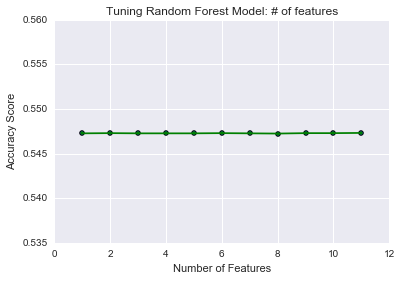

In [63]:
#plot results
#import matplotlib.pyplot as plt
#n = []
#v = []
#for est, val in test2:
   # n.append(est)
    #v.append(val)

#plt.title('Tuning Random Forest Model: # of features')
#plt.ylabel('Accuracy Score')
#plt.xlabel('Number of Features')
#plt.scatter(n, v, linewidths = 1)
#plt.plot(n,v,'.g-')
#plt.show()

In [57]:
# max_features=12 is best and n_estimators=240 is sufficiently large
feature_cols1 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
                  "deg_Master's", 'deg_Secondary', #"deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania']
X=cs50[feature_cols1]
y = cs50['outcome']
rfcl = RandomForestClassifier(n_estimators=240, max_features=12, oob_score=True, random_state=1)
rfcl.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=240, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [58]:
# compute feature importances
pd.DataFrame({'feature':feature_cols1, 'importance':rfcl.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
5,age,0.483829
6,cty_Unknown/Other,0.216577
4,deg_Secondary,0.029530
3,deg_Master's,0.029061
8,cty_Other Europe,0.020682
0,gd_f,0.020544
2,deg_Less than Secondary,0.016253
7,cty_India,0.015519
16,cty_Pakistan,0.008651
11,cty_Canada,0.008492


In [59]:
# compute the out-of-bag R-squared score
rfcl.oob_score_

0.55568460522592211

In [60]:
# ADD Course interaction variables w/max_features=12 is best and n_estimators=240 is sufficiently large
feature_cols1 = ['gd_f', 'deg_Doctorate', 'deg_Less than Secondary',
                  "deg_Master's", 'deg_Secondary', #"deg_Bachelor's",
 'age', 'cty_Unknown/Other', #'cty_United States'
 'cty_India', 'cty_Other Europe', 'cty_Other Africa', 
 'cty_United Kingdom', 'cty_Canada', 'cty_Brazil', 'cty_Other Middle East/Central Asia', 'cty_Other South Asia', 
 'cty_Russian Federation', 'cty_Pakistan', 'cty_Nigeria', 'cty_Australia', 'cty_Spain', 'cty_Other South America', 
 'cty_Philippines', 'cty_Egypt', 'cty_Germany', 'cty_Ukraine', 'cty_Other North & Central Amer., Caribbean', 
 'cty_France', 'cty_Mexico', 'cty_Morocco', 'cty_Other East Asia', 'cty_Poland', 'cty_Greece',
 'cty_Colombia', 'cty_China', 'cty_Indonesia', 'cty_Bangladesh', 'cty_Portugal', 'cty_Japan', 'cty_Other Oceania' ,'nevents', 'ndays_act' ]
X=cs50[feature_cols1]
y = cs50['outcome']
rfcl = RandomForestClassifier(n_estimators=240, max_features=12, oob_score=True, random_state=1)
rfcl.fit(X, y)
y_pc = rfcl.predict(X)
print pd.Series(y_pc).value_counts()

1    109138
0     52099
2      7094
3      1285
dtype: int64


In [61]:
# compute feature importances
pd.DataFrame({'feature':feature_cols1, 'importance':rfcl.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
39,nevents,0.389663
5,age,0.231881
40,ndays_act,0.165923
4,deg_Secondary,0.017370
3,deg_Master's,0.016801
6,cty_Unknown/Other,0.016491
0,gd_f,0.015461
7,cty_India,0.008599
10,cty_United Kingdom,0.008316
11,cty_Canada,0.007880


In [62]:
# compute the out-of-bag R-squared score
rfcl.oob_score_

0.58116569191585699

In [65]:
# Predicting who drops out after chapters 1 and 10
drop1 = cs50[(cs50['nchapters'] >= 1)]
drop10 = cs50[(cs50['nchapters'] >= 10)]
drop1.loc[(drop1['nchapters'] == 1), 'drop_ch1']=1
drop1.loc[(drop1['nchapters'] != 1), 'drop_ch1']=0
drop10.loc[(drop10['nchapters'] == 10), 'drop_ch10']=1
drop10.loc[(drop10['nchapters'] != 10), 'drop_ch10']=0
print drop1.shape
print drop10.shape

/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/TeddyandAlex/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(106484, 71)
(6543, 71)
